In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from prophet import Prophet


In [2]:
df = pd.read_csv('AAPL.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,180.959732,104487900
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663071,99310400
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910660,94537600
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007492,96904000
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176529,86709100
...,...,...,...,...,...,...,...
246,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900
247,2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
248,2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400
249,2022-12-29,127.989998,130.479996,127.730003,129.610001,129.610001,75703700


In [3]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df = df[['Date', 'Adj Close']]

In [7]:
df.head()

,Date,Adj Close
0,2022-01-03,180.959732
1,2022-01-04,178.663071
2,2022-01-05,173.910660
3,2022-01-06,171.007492
4,2022-01-07,171.176529


In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.set_index('Date')
df.head()

/var/folders/wk/1__f0f457zs4shb5sgjd_4x40000gn/T/ipykernel_78321/3555301724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


,Adj Close
Date,
2022-01-03,180.959732
2022-01-04,178.663071
2022-01-05,173.910660
2022-01-06,171.007492
2022-01-07,171.176529


In [9]:
df_interpol = df.resample('D').interpolate(method='time')
df_interpol

,Adj Close
Date,
2022-01-03,180.959732
2022-01-04,178.663071
2022-01-05,173.910660
2022-01-06,171.007492
2022-01-07,171.176529
...,...
2022-12-26,130.487500
2022-12-27,130.029999
2022-12-28,126.040001


In [10]:
df_interpol.isna().sum()

Adj Close    0
dtype: int64

In [11]:
df_interpol.sort_index(inplace=True)

In [12]:
n = int(len(df_interpol)*0.7)
train = df_interpol[:n]
test = df_interpol[n:]

display(train.tail(), test.head())

,Adj Close
Date,
2022-09-08,154.204208
2022-09-09,157.109375
2022-09-10,159.126027
2022-09-11,161.142680
2022-09-12,163.159332


,Adj Close
Date,
2022-09-13,153.585220
2022-09-14,155.052780
2022-09-15,152.117645
2022-09-16,150.450424
2022-09-17,151.708333


In [33]:
test.shape

(109, 1)

In [15]:
from pycaret.time_series import *

In [17]:
exp = setup(data=train, target='Adj Close', session_id=123, fh=14)

,Description,Value
0,session_id,123
1,Target,Adj Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(253, 1)"
5,Transformed data shape,"(253, 1)"
6,Transformed train set shape,"(239, 1)"
7,Transformed test set shape,"(14, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [19]:
exp.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,253.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,158.525972
3,Summary,Statistics,Transformed,Median,,161.150965
4,Summary,Statistics,Transformed,Standard Deviation,,12.157682
5,Summary,Statistics,Transformed,Variance,,147.809241
6,Summary,Statistics,Transformed,Kurtosis,,-0.763849
7,Summary,Statistics,Transformed,Skewness,,-0.476954
8,Summary,Statistics,Transformed,# Distinct Values,,247.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",3138.238424


In [20]:
exp.plot_model(plot='train_test_split')

In [21]:
exp.plot_model(plot='decomp')

In [22]:
top10 = compare_models(
    turbo=False,
    n_select=10,
    sort='RMSE'
)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
auto_arima,Auto ARIMA,1.2883,1.2117,6.6103,7.6807,0.0407,0.0411,-2.7975,0.6300
snaive,Seasonal Naive Forecaster,1.3393,1.2395,6.8753,7.8647,0.0420,0.0430,-3.1455,0.3800
arima,ARIMA,1.3402,1.2429,6.8759,7.8714,0.0423,0.0422,-3.3062,0.0467
tbats,TBATS,1.3578,1.2496,6.9692,7.9250,0.0427,0.0434,-3.0170,10.4533
naive,Naive Forecaster,1.3553,1.2510,6.9557,7.9352,0.0427,0.0435,-3.0720,1.4133
theta,Theta Forecaster,1.4158,1.2956,7.2667,8.2201,0.0446,0.0455,-3.4722,0.0200
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,1.4380,1.3175,7.3809,8.3603,0.0452,0.0463,-3.7226,0.1400
exp_smooth,Exponential Smoothing,1.4612,1.3389,7.4994,8.4952,0.0460,0.0470,-3.7882,0.4367
ets,ETS,1.4612,1.3390,7.4995,8.4954,0.0460,0.0470,-3.7883,0.0433
grand_means,Grand Means Forecaster,1.5399,1.3504,7.9096,8.5491,0.0475,0.0488,-4.0570,0.3933


In [23]:
for model in top10:
    exp.plot_model(model)

In [24]:
auto_arima = exp.create_model('auto_arima', fold=3)
plot_model(auto_arima)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-07-18,1.7218,1.5220,8.8201,9.6918,0.0560,0.0579,-4.8648
1,2022-08-01,0.8188,0.8298,4.2128,5.2695,0.0248,0.0253,-0.8942
2,2022-08-15,1.3244,1.2831,6.7979,8.0809,0.0412,0.0400,-2.6335
Mean,NaT,1.2883,1.2117,6.6103,7.6807,0.0407,0.0411,-2.7975
SD,NaT,0.3695,0.2871,1.8856,1.8275,0.0127,0.0134,1.6251


In [26]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  239
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 6)   Log Likelihood                -561.107
Date:                             Mon, 30 Jan 2023   AIC                           1126.214
Time:                                     12:15:14   BIC                           1133.159
Sample:                                 01-03-2022   HQIC                          1129.013
                                      - 08-29-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L6        0.2090      0.048      4.388      0.000       0.116       0.302
sigma2         6.5285      0.431     15.154      0.000       5.684       7.373
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                38.44
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                             0.17
Prob(H) (two-sided):                  0.16   Kurtosis:                         4.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
tuned_arima = exp.tune_model(auto_arima, fold=3, optimize='RMSE')
plot_model(tuned_arima)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2022-07-18,1.7218,1.5220,8.8201,9.6918,0.0560,0.0579,-4.8648
1,2022-08-01,0.8188,0.8298,4.2128,5.2695,0.0248,0.0253,-0.8942
2,2022-08-15,1.3244,1.2831,6.7979,8.0809,0.0412,0.0400,-2.6335
Mean,NaT,1.2883,1.2117,6.6103,7.6807,0.0407,0.0411,-2.7975
SD,NaT,0.3695,0.2871,1.8856,1.8275,0.0127,0.0134,1.6251


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    6.5s finished


<AxesSubplot: xlabel='Date'>

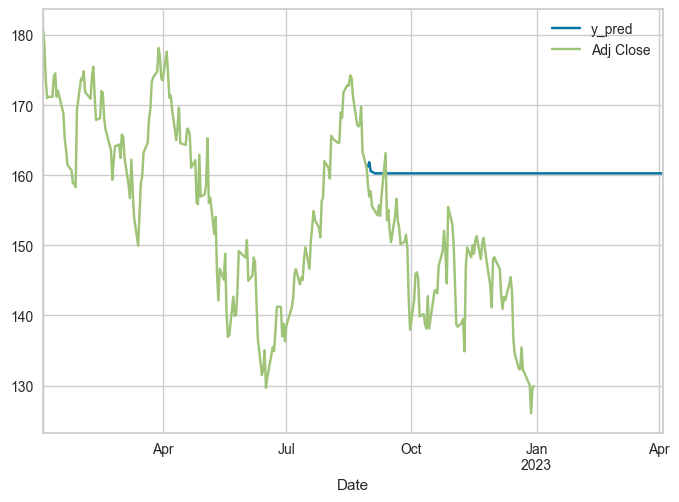

In [38]:
preds_arima = predict_model(tuned_arima, fh=218)
ax = preds_arima.plot()
df_interpol.plot(ax=ax)